In [34]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

## Load data

In [35]:
data = pd.read_csv('saved.csv')
data.columns = ['vid', 'distance_to_tls', 'time_to_green', 'leading_cars', 'duration']
data.pop('vid')
# split data to training and testing
train_set = data.sample(frac=0.75, random_state=0)
test_set = data.drop(train_set.index)
train_set_labels = train_set[['duration']]
test_set_labels = test_set_labels = test_set[['duration']]
train_set = train_set[['distance_to_tls', 'time_to_green', 'leading_cars']]
test_set = test_set[['distance_to_tls', 'time_to_green', 'leading_cars']]

In [36]:
X = torch.tensor(train_set.values, dtype=torch.float32)
y = torch.tensor(train_set_labels.values, dtype=torch.float32)
X_test = torch.tensor(test_set.values, dtype=torch.float32)
y_test = torch.tensor(test_set_labels.values, dtype=torch.float32)

In [37]:
X.size()

torch.Size([350, 3])

In [38]:
y.size()

torch.Size([350, 1])

## Define the neural network

In [39]:
class NeuralNetwork(nn.Module):
    def __init__(self, ):
        super(NeuralNetwork, self).__init__()
        
        self.inputSize = 3
        self.outputSize = 1
        self.hiddenSize = 3
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize)
        self.W2 = torch.randn(self.hiddenSize, self.outputSize)
        
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    def backward(self, X, y, o):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
        
    def train(self, X, y):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o)
        
    def saveWeights(self, model):
        # we will use the PyTorch internal storage functions
        torch.save(model, "NN")
        # you can reload model with all the weights and so forth with:
        # torch.load("NN")

## Perform learning

In [40]:
NN = NeuralNetwork()
for i in range(1000):  # trains the NN 1,000 times
    print ("#" + str(i) + " Loss: " + str(torch.mean((y - NN(X))**2).detach().item()))  # mean sum squared loss
    NN.train(X, y)
NN.saveWeights(NN)

#0 Loss: 1995.5035400390625
#1 Loss: 1950.988525390625
#2 Loss: 1950.988525390625
#3 Loss: 1950.988525390625
#4 Loss: 1950.988525390625
#5 Loss: 1950.988525390625
#6 Loss: 1950.988525390625
#7 Loss: 1950.988525390625
#8 Loss: 1950.988525390625
#9 Loss: 1950.988525390625
#10 Loss: 1950.988525390625
#11 Loss: 1950.988525390625
#12 Loss: 1950.988525390625
#13 Loss: 1950.988525390625
#14 Loss: 1950.988525390625
#15 Loss: 1950.988525390625
#16 Loss: 1950.988525390625
#17 Loss: 1950.988525390625
#18 Loss: 1950.988525390625
#19 Loss: 1950.988525390625
#20 Loss: 1950.988525390625
#21 Loss: 1950.988525390625
#22 Loss: 1950.988525390625
#23 Loss: 1950.988525390625
#24 Loss: 1950.988525390625
#25 Loss: 1950.988525390625
#26 Loss: 1950.988525390625
#27 Loss: 1950.988525390625
#28 Loss: 1950.988525390625
#29 Loss: 1950.988525390625
#30 Loss: 1950.988525390625
#31 Loss: 1950.988525390625
#32 Loss: 1950.988525390625
#33 Loss: 1950.988525390625
#34 Loss: 1950.988525390625
#35 Loss: 1950.988525390625
#

#286 Loss: 1950.988525390625
#287 Loss: 1950.988525390625
#288 Loss: 1950.988525390625
#289 Loss: 1950.988525390625
#290 Loss: 1950.988525390625
#291 Loss: 1950.988525390625
#292 Loss: 1950.988525390625
#293 Loss: 1950.988525390625
#294 Loss: 1950.988525390625
#295 Loss: 1950.988525390625
#296 Loss: 1950.988525390625
#297 Loss: 1950.988525390625
#298 Loss: 1950.988525390625
#299 Loss: 1950.988525390625
#300 Loss: 1950.988525390625
#301 Loss: 1950.988525390625
#302 Loss: 1950.988525390625
#303 Loss: 1950.988525390625
#304 Loss: 1950.988525390625
#305 Loss: 1950.988525390625
#306 Loss: 1950.988525390625
#307 Loss: 1950.988525390625
#308 Loss: 1950.988525390625
#309 Loss: 1950.988525390625
#310 Loss: 1950.988525390625
#311 Loss: 1950.988525390625
#312 Loss: 1950.988525390625
#313 Loss: 1950.988525390625
#314 Loss: 1950.988525390625
#315 Loss: 1950.988525390625
#316 Loss: 1950.988525390625
#317 Loss: 1950.988525390625
#318 Loss: 1950.988525390625
#319 Loss: 1950.988525390625
#320 Loss: 195

#568 Loss: 1950.988525390625
#569 Loss: 1950.988525390625
#570 Loss: 1950.988525390625
#571 Loss: 1950.988525390625
#572 Loss: 1950.988525390625
#573 Loss: 1950.988525390625
#574 Loss: 1950.988525390625
#575 Loss: 1950.988525390625
#576 Loss: 1950.988525390625
#577 Loss: 1950.988525390625
#578 Loss: 1950.988525390625
#579 Loss: 1950.988525390625
#580 Loss: 1950.988525390625
#581 Loss: 1950.988525390625
#582 Loss: 1950.988525390625
#583 Loss: 1950.988525390625
#584 Loss: 1950.988525390625
#585 Loss: 1950.988525390625
#586 Loss: 1950.988525390625
#587 Loss: 1950.988525390625
#588 Loss: 1950.988525390625
#589 Loss: 1950.988525390625
#590 Loss: 1950.988525390625
#591 Loss: 1950.988525390625
#592 Loss: 1950.988525390625
#593 Loss: 1950.988525390625
#594 Loss: 1950.988525390625
#595 Loss: 1950.988525390625
#596 Loss: 1950.988525390625
#597 Loss: 1950.988525390625
#598 Loss: 1950.988525390625
#599 Loss: 1950.988525390625
#600 Loss: 1950.988525390625
#601 Loss: 1950.988525390625
#602 Loss: 195

#850 Loss: 1950.988525390625
#851 Loss: 1950.988525390625
#852 Loss: 1950.988525390625
#853 Loss: 1950.988525390625
#854 Loss: 1950.988525390625
#855 Loss: 1950.988525390625
#856 Loss: 1950.988525390625
#857 Loss: 1950.988525390625
#858 Loss: 1950.988525390625
#859 Loss: 1950.988525390625
#860 Loss: 1950.988525390625
#861 Loss: 1950.988525390625
#862 Loss: 1950.988525390625
#863 Loss: 1950.988525390625
#864 Loss: 1950.988525390625
#865 Loss: 1950.988525390625
#866 Loss: 1950.988525390625
#867 Loss: 1950.988525390625
#868 Loss: 1950.988525390625
#869 Loss: 1950.988525390625
#870 Loss: 1950.988525390625
#871 Loss: 1950.988525390625
#872 Loss: 1950.988525390625
#873 Loss: 1950.988525390625
#874 Loss: 1950.988525390625
#875 Loss: 1950.988525390625
#876 Loss: 1950.988525390625
#877 Loss: 1950.988525390625
#878 Loss: 1950.988525390625
#879 Loss: 1950.988525390625
#880 Loss: 1950.988525390625
#881 Loss: 1950.988525390625
#882 Loss: 1950.988525390625
#883 Loss: 1950.988525390625
#884 Loss: 195

In [41]:
y_pred = NN.forward(X_test)

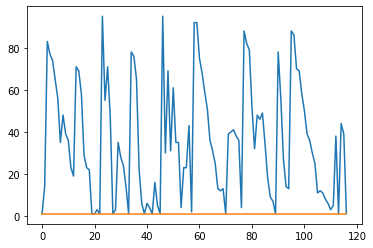

In [42]:
plt.plot(y_test)
plt.plot(y_pred)

In [32]:
train_set['distance_to_tls'].median()

216.43560229289437

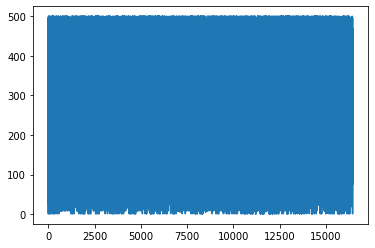

In [33]:
plt.plot(range(len(train_set)), train_set['distance_to_tls'])